# Mandelbrotmenge

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/dSA7OZHdaoA" 
frameborder="0" allowfullscreen></iframe>

## Einführung in komplexe Zahlen


Für eine gegebene Zahl $x$ aus dem Raum der positiven reellen Zahlen $x \in \mathbb{R}^{+}$ ist es uns möglich, eine weitere Zahl $\omega$ im Reellen zu finden $\omega \in \mathbb{R}$, welche $\sqrt{x} = \omega$ oder auch alternativ $\omega^{2} = x$ erfüllt. Ist $x$ jedoch negativ $x \in \mathbb{R}^{-}$ ist uns dies nicht möglich, da das Quadrat einer Zahl im Reelen nicht negativ werden kann. Deshalb sagen wir, dass für $\sqrt{x} | x \in \mathbb{R}^{-}$ nicht definiert ist.

Um diese Einschränkung zu umgehen erweitern wir unseren Zahlenraum durch das Einbinden einer neuen Zahl $i$, der sog. imaginären Zahl. In der Elektrowischenschaft und manchen Programmiersprachen wird diese auch manchmal als $j$ notiert, weshalb wir folglich mit der $j$-Notation arbeiten werden. Wir definieren dass $j^{2} = -1$ und folglich ist $\sqrt{-1} = j$. Den Zahlen Raum der sich daraus ergibt nennen wir *Komplex* und notieren ihn als $\mathbb{C}$. 
j lässt sich mit r kombinieren.
Ein *komplexe Zahl* $c \in \mathbb{C}$ hat typischerweise die Form $a + bj$ wobei wir $a$ den *Realteil* und $b$ den *Imaginärteil* von $c$ nennen.

Komplexe Zahlen können zum Beispiel hilfreich bei der Nullstellensuche einer Quadratischen Gleichung sein, die keine Lösung im Reelen hat. Für $x^{2} - 2x + 5 = 0$ erhalten wir die Nullstellen $x_{1, 2} = 1 \pm \sqrt{-4}$ welche im Reelen nicht existieren, aber im Komplexen lösbar sind.

>$x_{1, 2} = 1 \pm \sqrt{-4}$
>
>$x_{1, 2} = 1 \pm \sqrt{4} \cdot \sqrt{-1}$
>
>$x_{1, 2} = 1 \pm 2j$

Im Komplexen lässt sich ähnlich *addieren, subtrahieren und multiplizieren* wie mit einer komplexen und einer reellen Variable. Für $c \in \mathbb{C}$ sind die Operationen $\sqrt{c}, x^{c}, \frac{x}{c}$ etwas aufwändiger und werden deshalb von uns nicht weiter betrachtet.

>$(a + bj) + (c + dj) = (a + c) + (b + d)j$
>
>$(a + bj) - (c + dj) = (a - c) + (b - d)j$
>
>$(a + bj) \cdot (c + dj) = (a \cdot c + (b \cdot d)j) + (a \cdot d + b \cdot c)j = (ac - bd) + (ad + bc)j$

 Als Betrag einer komplexen Zahl bezeichnen wir ihren Abstand zum Ursprung $|a+bj| = \sqrt{a^{2}+b^{2}}$.

## Python


Python ermöglicht es uns mit komplexen Zahlen als builtin Datentyp zu rechnen.
~~~python
c = 3-2j
~~~
Um auf die Real- und Imaginärteile einer Zahl zuzugreifen können wir folgende Attribute verwenden.
~~~python
c.real
c.imag
~~~
Den Betrag erhalten wir wie üblich mit der abs.funktion.
~~~python
abs(c)
~~~
Es folgen ein paar veranschaulichende Beispiele:

In [2]:
print(
1j**2,
(3-2j).imag,
(2+3j)*(-1+1j),
abs(3+4j))

(-1+0j) -2.0 (-5-1j) 5.0


## Darstellung

Die beiden Komponenten einer komplexen Zahl können wir als Punkt in einem zweidimensionalen Koordinatiensystem darstellen. Dabei bezeichnet die Horizontale Achse den Realteil ein einer Zahl und die Vertikale ihren Imaginärteil. Diese komplexe Zahlen ebene nennen wir auch *Gaußsche Zahlenebene*.

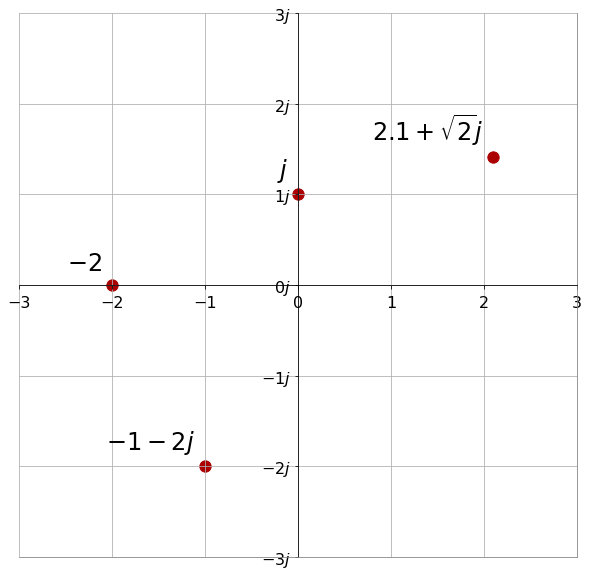

In [3]:
"""
==========================
DIESER CODE IST IRELEVANT!
==========================
"""

%matplotlib inline
from matplotlib import pyplot as plt
from math import sqrt

# Creating Plots
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

# Creating Data
re = [0, 2.1, -2, -1]
im = [1, sqrt(2), 0, -2]
labels = ["$j$", "$2.1+\sqrt{2}j$", "$-2$", "$-1-2j$"]
ticks = list(range(-3, 4))

# Customizing y-axis ticks
tick_labels = list("${} j$".format(x) for x in range(-3, 4))
plt.yticks(ticks, tick_labels)
plt.tick_params(labelsize=16)


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['top'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('grey')
ax.spines['bottom'].set_color('grey')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')

# Setting bounds for axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Create grid and postition x-ticks
plt.grid(True)
ax.get_xaxis().set_tick_params(direction='in', pad=-25)

# Create points and lables
plt.scatter(re, im, color="#aa0000", s=128)
for x, y, label in zip(re, im, labels):
    plt.annotate(label, xy=(x, y), xytext=(-10,10), textcoords='offset points', ha='right', va='bottom', size=24)

# Show plot
plt.show()

## Mandelbrot Formel


Wir definieren eine Sequenzformel (Reihe) $P_{c}(z)$ für $c, z \in \mathbb{C}$. Diese Formel hat einen fixen wert $c$ und einen Zustand $z$. Zu Beginn ist unser Zustand $z_{0} = 0$. Alle nachfolgenden Zuständ sind definiert durch $z_{n+1}=z_{n}^{2}+c$. Damit ist $P_{c}: z \mapsto z^{2}+c$. Die für ein gegebenes $c$ entstehenden Zustände $z_{n}$ ergeben unserre Sequenz. Das generieren von $n$ Sequenzelementen nennen wir Iteration über $P_{c}$ und notieren es als $P_{c}^{n}$.

### Beispiel



| $n$  |||$c$    |$z_{n}$|$z_{n}^{2}+c$|||$c$    |$z_{n}$|$z_{n}^{2}+c$    |
|------|-|-------|-------|-------------|-|-------|-------|-----------------|
|  $0$ |||$- 1$  |$0    $|$0^{2} - 1$  |||$1-j$  | $0$   |$0^{2}+1-j$      |
|$1$   |||$- 1$  |$   -1$|$(-1)^{2}-1$ |||$1-j$  |  $1-j$|$(1-j)^{2}+1-j$  |
|  $2$ |||$- 1$  |$0    $|$0^{2} - 1$  |||$1-j$  | $1-3j$|$(1-3j)^{2}+1-j$ |
|$3  $ |||$- 1$  |$   -1$|$(-1)^{2}-1$ |||$1-j$  |$-7-7j$|$(-7-7j)^{2}+1-j$|


Wir stellen fest, dass die Sequenz für einige Punkte in einem *beschränkten* Bereich bleiben $(\exists s \in \mathbb{R^{+}}:\lim_{n \to \infty} |P_{c}^{n}| \leqslant s)$, wärend andere Stetig wachsen und ins Unendliche *konvergieren* $(\lim_{n \to \infty} |P_{c}^{n}| = \infty)$. Alle Punkte, deren Sequenz beschränkt bleibt sind Teil der Mandelbrotmenge $\mathrm{M}$. Die formale Definition lautet:

$$P_{c}: z_{n} \mapsto z_{n}^{2}+c$$

$$\mathrm{M} = \{c \in \mathbb{C} | (\exists s \in \mathbb{R}^{+}) (\forall n \in \mathbb{N}) (|P_{c}^{n}(0)|\leqslant s)\}$$

## Programmierung

Da wir nicht ohne weiteres feststellen können, ob die Sequenz für eine gegebenes $c \in \mathbb{C}$ konvergiert, verwenden wir zwei Tricks.
Es lässt sich beweisen, dass sollte für ein Sequenzelement $|P_{c}^{n}|>2$ gelten, ergo würde $P_{c}^{n}$ außerhalb des Kreises um den Ursprung der Gaußschenzahlenebene mit Radius zwei liegen, die Iteration über $P_{c}{n}$ definitiv konvergieren wird und damit $c \not \in \mathrm{M}$ liegen kann.
Da wir keine unendliche Sequenz erstellen können um festzustellen ob $P_{c}^{n}$ jemals außerhalb dieser Begrenzung liegen wird, legen wir eine maximale Anzahl an Iterationen fest. Sollte nach der letzten Iteration eine Sequenz unsere Begrenzung noch nicht überschrittern haben, so können wir sehr wahrscheinlich davon ausgehen, dass $c \in \mathrm{M}$ gilt.

$$ c \in \mathrm{\hat{M}} := \limsup_{n \to N} |P_{c}^{n}|\leqslant 2 $$

Wobei $N$ die maximale Anzahl an Iterationen und $\mathrm{\hat{M}}$ unsere *Aproximation* (Annäherung) an die tatsächliche Mandelbrotmenge ist.

Um nun zu bestimmen, ob eine gegebene komplexe Zahl $c \in \mathrm{\hat{M}}$ liegt können wir folgenden Code verwenden. 

In [4]:
import numpy as np

def mandelbrot(c, N=256):
    z = 0
    for _ in range(N):
        z = z**2 + c
        if abs(z) > 2:
            return False
    return True

def draw_fractal(status=True):
    for im in np.linspace(-1.2j, 1.2j, 45):
        for re in np.linspace(-2, 2, 80):
            c = re + im
            if mandelbrot(c):
                if status:
                    print("⬛", end="")
            else:
                if status:
                    print("  ", end="")
        if status:
            print("")

%timeit draw_fractal(False)
draw_fractal()

91.2 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                            

### Performanz

Momentan ist unsere Methode der Berechnung noch recht ineffizient. Bislang errechnen wir für jeden Pixel $N$ Schritte. Um Performanz zu gewinnen erstellen wir ein Feld als Matrix `C`, in welcher unsere gaußsche Zahlenebene enthalten sein wird. Anschließend erstellen wir eine Indexmatrix `I`, welche einen `bool`-Wert für jeden Punkt in `C` enthalten wird, der angibt, ob bei der letzten Berechnung von `Z` die Begrenzung von 2 überschritten wurde.

In [5]:
def mandelbrot(C, N=256):
    Z = np.zeros_like(C)
    for _ in range(N):
        I = abs(Z) <= 2.
        Z[I] = Z[I]**2 + C[I]
    return abs(Z) < 2

def draw_fractal(status=True):
    nx, ny = 80, 45
    X = np.linspace(-2, 2, nx)
    Y = np.linspace(1.2, -1.2, ny)
    C = X + Y[:, None] * 1j
    M = mandelbrot(C)

    for y in range(ny):
        for x in range(nx):
            if M[y, x]:
                if status:
                    print("⬛", end="")
            else:
                if status:
                    print("  ", end="")
        if status:
            print("")

%timeit draw_fractal(False)
draw_fractal()

13.3 ms ± 38.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                           

### Visualisierung

Zur bildlichen Darstellung werden wir `matplotlib` verwenden. Dazu wollen wir die zurückgegebene Matrix als Zahlendatentyp erhalten und fügen deshalb `.astype(np.int)` an. Über `plt.imshow(matrix)` können wir die Mandelbrotmatrix an das `matplotlib.pyplot` Objekt übergeben. `plt.set_cmap('binary')` gibt für die graphische Darstellung die Farbpallete vor. Unter https://matplotlib.org/users/colormaps.html könnt ihr euch weitere Farben aussuchen. Dies wird jedoch erst mit dem Folgeschritt wirklich interessant.

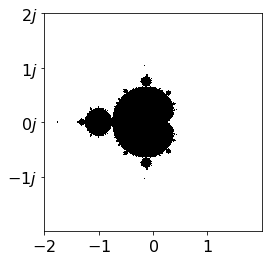

In [7]:
def mandelbrot(C, N=256):
    Z = np.zeros_like(C)
    for _ in range(N):
        I = abs(Z) <= 2.
        Z[I] = Z[I]**2 + C[I]
    return (abs(Z) < 2).astype(np.int)

nx, ny = 0x400, 0x400
X = np.linspace(-2, 2, nx).astype(np.float64)
Y = np.linspace(2, -2, ny).astype(np.float64)
C = (X + Y[:, None] * 1j).astype(np.complex128)
M = mandelbrot(C)


def draw_fractal(M, colour="binary"):
    plt.imshow(M, interpolation="nearest")
    plt.set_cmap(colour)

    # Plot formatting
    plt.xticks(list(range(0, nx, nx//4)), list("${}$".format(x) for x in range(-2, 3)))
    plt.yticks(list(range(0, ny, ny//4)), list("${}j$".format(-y) for y in range(-2, 3)))
    plt.tick_params(labelsize=16)

    #plt.colorbar()
    plt.show()

draw_fractal(M)

### Farben

Um unsere Graphik zu kolorieren wollen wir den Punkten außerhalb von $\mathrm{\hat{M}}$ einen Farbwert zuordnen. Dies tun wir indem wir uns für jeden Punkt merken, ab welcher Iteration er die Begrenzung überschreitet $n$. Anhand dieser Werte können wir nun jedem Punkt eine Farbe zuordnen. Um eine preziesere Farbverteilung zu erhalten setzten wir unsere Begrenzung `horizon` hoch.

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


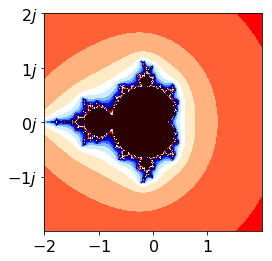

In [8]:
def mandelbrot(C, N=256, horizon=0x1000):
    Z = np.zeros_like(C)
    N_ = np.zeros_like(C)
    for n in range(N):
        I = abs(Z) <= horizon
        Z[I] = Z[I]**2 + C[I]
        N_[I] = n
    N_[I] = 16
    return N_.astype(np.float64)

M = mandelbrot(C)
draw_fractal(M, "flag")

### Smooth colouring algorithm

Um den Übergang zwischen den Farbbahnen fließend zu gestalten verwenden wir den *Smoothcolouring Algorithmus*. Dieser normalisiert die ganzzahligen Werte aus $n$. Liegt es wird jedem Punkt ein Wert im Intervall $[0, 1]$ aufaddiert abhängig davon ob er näher an der Innenkante oder der Außenkante seiner Farbbahn liegt. Den normalisierten Wert erhalten wir durch die folgende Formel:

$$\mathscr{v}(z) = n + 1 - \log_{P}\left(
 \frac{\log|z|}
{\log(N)}\right)$$

Wobei $n$ unsere für jeden Punkt erreichte Anzahl an Iterationen, $N$ unsere maximal Anzahl an Iterationen, $P$ unser Exponent in der Mandelbrotformel $z_{n+1} = z_{n}^{P}+c$ mit $P=2$ und $z$ unser letztes Sequenzelement ist. Zu guter Letzt verwenden wir noch einen weiteren Logarithmus, um die Farbpallette noch ein wenig zu strecken.


#### Anmerkung
>Mit anderen Werten für $P$ lassen sich weitere Fraktale der selben Familie bilden.

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


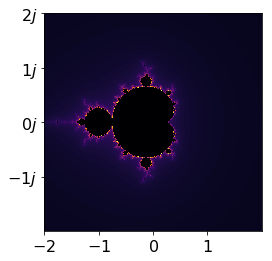

In [ ]:
def mandelbrot(C, N=0x200, horizon=0x1000):
    Z = np.zeros_like(C)
    N_ = np.zeros_like(C)
    for n in range(N):
        I = abs(Z) <= horizon
        Z[I] = Z[I]**2 + C[I]
        N_[I] = n
    N_[I] = 0
    return I, N_, Z

def smooth_colour(Z, N_):
    with np.errstate(invalid='ignore'):
        return np.nan_to_num(N_ + 1 - np.log2(np.log(np.abs(Z))/np.log(0x1000)))

def strech_pallette(M):
    return np.log(np.log(M + 0x14)+0x100)

def interpolate(a, b, c):
    return a + (b-a)*c

I, N_, Z = mandelbrot(C)
M = smooth_colour(Z, N_).astype(np.float64)

# Streching pallette
M = strech_pallette(M)

# Coloring interior black
M[I] = np.min(M)

draw_fractal(M, "inferno") # inferno, magma, viridis, ocean, hot, winter, rainbow, gist_stern, gnu_plot